<a href="https://colab.research.google.com/github/doissegundos/Titanic_Machine_Learning_Kaggle/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic - Machine Learning from Disaster
Link do dataset: https://www.kaggle.com/c/titanic/overview

Links uteis: https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial

https://www.kaggle.com/brendan45774/titanic-top-solution


### Leitura dos dados

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import sys
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
#Importando o dataset do Github
df_train = pd.read_csv('https://raw.githubusercontent.com//doissegundos/Titanic_Machine_Learning_Kaggle/main/dataset/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com//doissegundos/Titanic_Machine_Learning_Kaggle/main/dataset/test.csv')
df_testY = pd.read_csv('https://raw.githubusercontent.com//doissegundos/Titanic_Machine_Learning_Kaggle/main/dataset/gender_submission.csv')

In [3]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C


In [4]:
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,1051,3,"Peacock, Mrs. Benjamin (Edith Nile)",female,26.0,0,2,SOTON/O.Q. 3101315,13.7750,NaN,S
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.7000,G6,S
17,909,3,"Assaf, Mr. Gerios",male,21.0,0,0,2692,7.2250,NaN,C
333,1225,3,"Nakid, Mrs. Said (Waika Mary"" Mowad)""",female,19.0,1,1,2653,15.7417,NaN,C
80,972,3,"Boulos, Master. Akar",male,6.0,1,1,2678,15.2458,NaN,C


In [5]:
df_testY.sample(5)

,PassengerId,Survived
213,1105,1
19,911,1
395,1287,1
123,1015,0
386,1278,0


Verificando os dados nulos

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Informações sobre o dataset

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Limpeza dos dados

#### Age

A coluna idade contém muitos valores nulos, com isso vamos substituir os valores nulos pela media da idade.

In [9]:
#media da idade dos passageiros
int(df_train['Age'].mean())

29

In [10]:
df_train['Age'] = df_train['Age'].fillna(int(df_train['Age'].mean()))
df_test['Age'] = df_test['Age'].fillna(int(df_test['Age'].mean()))

É importante converter a coluna de idade para o tipo inteiro

In [11]:
df_train['Age'] = df_train['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)

In [12]:
df_train['Age'].describe()

count    891.000000
mean      29.544332
std       13.013778
min        0.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Dividir a idade dos passageiros em categorias, de acordo com os quartis

In [36]:
df_train.Age.describe()

count    891.000000
mean      29.544332
std       13.013778
min        0.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [37]:
df_train['Agec']=pd.cut(
   df_train['Age'],
   bins=[0, 22, 29, 35, sys.maxsize],
   labels=['0', '1', '2', '3']
)

In [39]:
df_test['Agec']=pd.cut(
   df_test['Age'],
   bins=[0, 22, 29, 35, sys.maxsize],
   labels=['0', '1', '2', '3']
)

In [38]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexC,EmbarkedC,Agec
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,29,1,0,65303,19.9667,NaN,S,1,2,1
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40,0,2,A/5. 851,14.5000,NaN,S,1,2,3
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48,1,3,W./C. 6608,34.3750,NaN,S,0,2,3
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34,0,0,3101264,6.4958,NaN,S,1,2,2
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35,1,0,113789,52.0000,NaN,S,0,2,2


#### Sex

É importante categorizar o sexo dos passageiros:

 0 - Mulher

 1 - Homem

In [13]:
#Para o dataset de treinamento
df_train["SexC"] = np.nan
df_train.loc[df_train.Sex == 'male', 'SexC'] = 1
df_train.loc[df_train.Sex == 'female', 'SexC'] = 0
df_train['SexC'] = df_train['SexC'].astype(int)

In [14]:
#Para o dataset de teste
df_test["SexC"] = np.nan
df_test.loc[df_test.Sex == 'male', 'SexC'] = 1
df_test.loc[df_test.Sex == 'female', 'SexC'] = 0
df_test['SexC'] = df_test['SexC'].astype(int)

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  SexC         418 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 39.3+ KB


In [16]:
df_train.sample(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexC
870,871,0,3,"Balkic, Mr. Cerin",male,26,0,0,349248,7.8958,NaN,S,1
747,748,1,2,"Sinkkonen, Miss. Anna",female,30,0,0,250648,13.0000,NaN,S,0
150,151,0,2,"Bateman, Rev. Robert James",male,51,0,0,S.O.P. 1166,12.5250,NaN,S,1
296,297,0,3,"Hanna, Mr. Mansour",male,23,0,0,2693,7.2292,NaN,C,1
810,811,0,3,"Alexander, Mr. William",male,26,0,0,3474,7.8875,NaN,S,1
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31,0,0,C.A. 18723,10.5000,NaN,S,1
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48,1,0,11755,39.6000,A16,C,0
163,164,0,3,"Calic, Mr. Jovo",male,17,0,0,315093,8.6625,NaN,S,1


#### Embarked

A coluna Embarked contém 3 itens, que serão substituidos por valores numericos e inteiros.

0 - C

1 - Q

2 - s

In [17]:
df_train.groupby(['Embarked']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,SexC
Embarked,,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168,69,168
Q,77,77,77,77,77,77,77,77,77,77,4,77
S,644,644,644,644,644,644,644,644,644,644,129,644


In [18]:
df_test.groupby(['Embarked']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,SexC
Embarked,,,,,,,,,,,
C,102,102,102,102,102,102,102,102,102,49,102
Q,46,46,46,46,46,46,46,46,46,1,46
S,270,270,270,270,270,270,270,270,269,41,270


Substituir valores nulos pelo que mais se repede dentro do dataset

In [19]:
df_train['Embarked'] = df_train['Embarked'].fillna("S")
df_test['Embarked'] = df_test['Embarked'].fillna("S")

In [20]:
#Para o dataset de treinamento
df_train["EmbarkedC"] = np.nan
df_train.loc[df_train.Embarked == 'C', 'EmbarkedC'] = 0
df_train.loc[df_train.Embarked == 'Q', 'EmbarkedC'] = 1
df_train.loc[df_train.Embarked == 'S', 'EmbarkedC'] = 2
df_train['EmbarkedC'] = df_train['EmbarkedC'].astype(int)

In [21]:
#Para o dataset de teste
df_test["EmbarkedC"] = np.nan
df_test.loc[df_test.Embarked == 'C', 'EmbarkedC'] = 0
df_test.loc[df_test.Embarked == 'Q', 'EmbarkedC'] = 1
df_test.loc[df_test.Embarked == 'S', 'EmbarkedC'] = 2
df_test['EmbarkedC'] = df_test['EmbarkedC'].astype(int)

In [24]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexC,EmbarkedC
714,715,0,2,"Greenberg, Mr. Samuel",male,52,0,0,250647,13.0000,NaN,S,1,2
195,196,1,1,"Lurette, Miss. Elise",female,58,0,0,PC 17569,146.5208,B80,C,0,0
716,717,1,1,"Endres, Miss. Caroline Louise",female,38,0,0,PC 17757,227.5250,C45,C,0,0
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,NaN,S,1,2
158,159,0,3,"Smiljanic, Mr. Mile",male,29,0,0,315037,8.6625,NaN,S,1,2


### Visualizando o dataset

Sex

In [25]:
#Taxa de sobrevivencia entre mulheres
p_mulher = df_train.loc[df_train.Sex == 'female']["Survived"]
print("Taxa de sobrevivencia entre mulheres: " + str(sum(p_mulher)/len(p_mulher)))

Taxa de sobrevivencia entre mulheres: 0.7420382165605095


In [26]:
#Taxa de sobrevivencia entre homens
p_homem = df_train.loc[df_train.Sex == 'male']["Survived"]
print("Taxa de sobrevivencia entre mulheres: " + str(sum(p_homem)/len(p_homem)))

Taxa de sobrevivencia entre mulheres: 0.18890814558058924


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



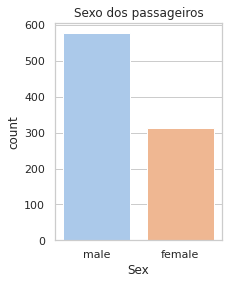

In [27]:
plt.figure(figsize=(3, 4))
sns.set_theme(style="whitegrid")
sns.countplot('Sex',data=df_train,palette="pastel")
plt.title('Sexo dos passageiros') 
plt.show()

Pclass

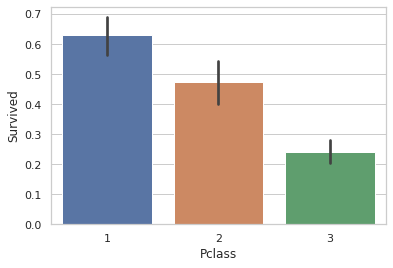

In [28]:
#Taxa de sobrevivencia de acordo com sua classe
sns.barplot(x='Pclass', y='Survived', data=df_train);

Embarket

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



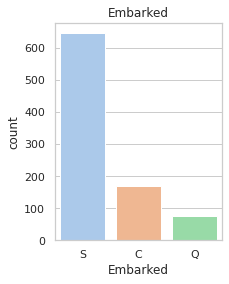

In [29]:
#Onde os passageiros embarcaram
plt.figure(figsize=(3, 4))
sns.set_theme(style="whitegrid")
sns.countplot('Embarked',data=df_train,palette="pastel")
plt.title('Embarked') 
plt.show()

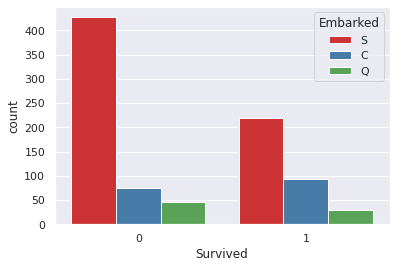

In [30]:
# Quandos sobreviveram de acordo com onde embarcou
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=df_train, hue="Embarked", palette="Set1");

Age

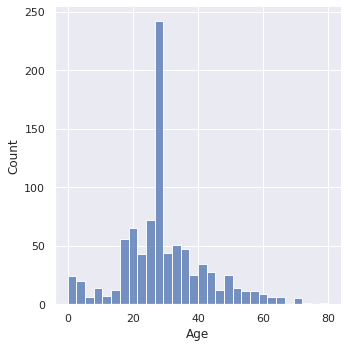

In [31]:
#Distribuição da idade dos passageiros
sns.set_theme(style="darkgrid")
sns.displot(data=df_train, x="Age")

### Classificação

In [33]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexC,EmbarkedC
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,2
